### Importar librerias

In [60]:
from skimage import io, segmentation, filters, data, morphology, feature
import numpy as np
import matplotlib.pyplot as plt

### Segmentación por regiones:
La segmentación de regiones permite dividir una imagen en áreas significativas para el análisis y detección de objetos.

c:\Users\Gustavo\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


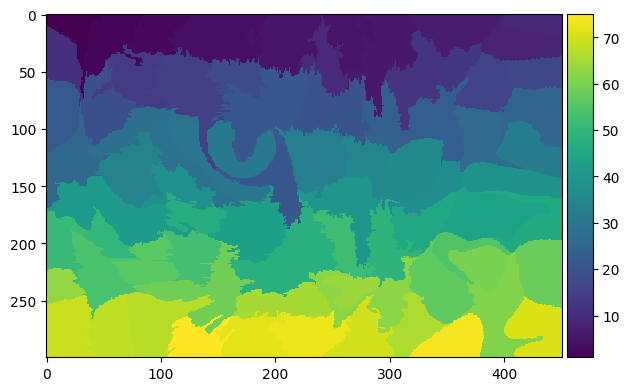

In [46]:
# Cargar una imagen en color
image_color = data.cat()

def region_segmentation(image):
    return [image, segmentation.slic(image, n_segments=100, compactness=10)]

# Segmentar la imagen en superpíxeles
img, segments = region_segmentation(image_color)

# Mostrar la imagen segmentada
io.imshow(segments)

### Filtro de realce (Sharpening):
El siguiente algoritmo nos ayudara para mejorar la nitidez de la imagen

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_3588\1339521625.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = filters.gaussian(image, sigma=1.0)


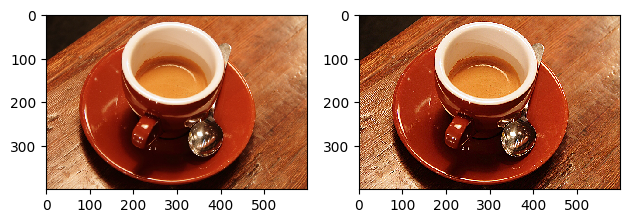

In [4]:
def sharpen_image(image, alpha=1.5):
    blurred = filters.gaussian(image, sigma=1.0)
    sharpened = np.clip(image + alpha * (image - blurred), 0, 1.0)
    return [image, sharpened]

img = data.coffee() / 255.0

normal_img, newImg = sharpen_image(img)

plt.subplot(1, 2 ,1)
io.imshow(normal_img)

plt.subplot(1, 2, 2)
io.imshow(newImg)

### Transformada de Fourier:

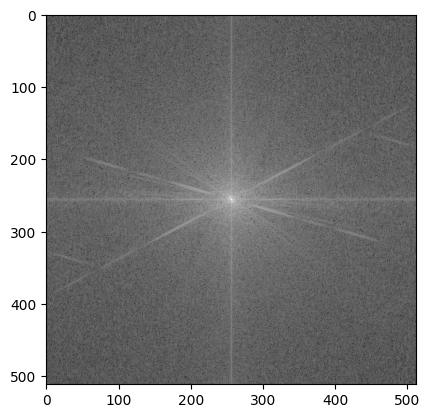

In [7]:
def fourier_transform(image):
    segments = np.fft.fftshift(np.fft.fft2(image))
    magnitude_spectrum = np.abs(segments)
    newImg = np.log(1 + magnitude_spectrum)
    return [image, newImg]

# We need to reescalate the image to values between 0 and 1 because the fourier transform needs it
camera_img = data.camera() / 255.0

# Segmentar la imagen en regiones
img, newImg = fourier_transform(camera_img)

plt.imshow(newImg, cmap='gray')

### Dilatación y erosión:

(-0.5, 511.5, 511.5, -0.5)

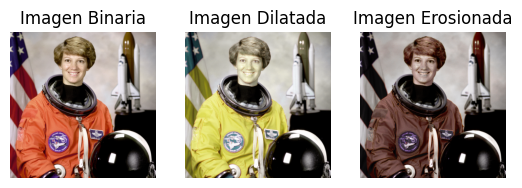

In [27]:
def dilate_image(image):
    return morphology.dilation(image)

def erode_image(image):
    return morphology.erosion(image)

# Cargar una imagen en escala de grises (binaria)
image_binary = data.astronaut()

# Aplicar dilatación y erosión a la imagen binaria
dilated_image = dilate_image(image_binary)
eroded_image = erode_image(image_binary)

# Mostrar las imágenes
plt.subplot(1, 3, 1)
plt.imshow(image_binary, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Imagen Dilatada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Imagen Erosionada')
plt.axis('off')

### Filtro de suavizado (Blurring):

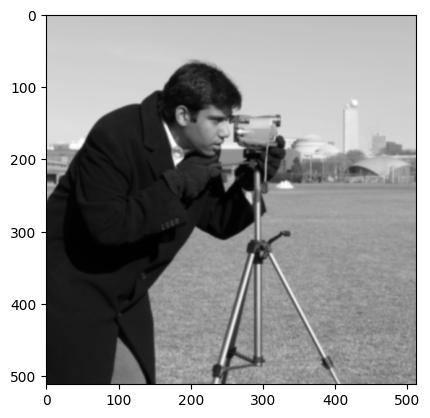

In [44]:
def blur_image(image, sigma=1.0):
    return [image, filters.gaussian(image, sigma)]

img = data.camera()

normal_img, img_blurred = blur_image(img)
plt.imshow(img_blurred, cmap="gray")

### Detección de bordes (Edge detection):

(-0.5, 511.5, 511.5, -0.5)

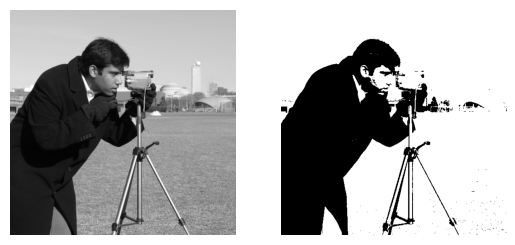

In [47]:
# Algoritmo de thresholding
def apply_thresholding(image):
    # Aplicar un algoritmo de umbralización(thresholding) no supervisado (Otsu)
    umbral = filters.threshold_otsu(image)
    imagen_segmentada = image > umbral
    
    return [image, imagen_segmentada]

# Cargar una imagen en escala de grises
image_gray = data.camera()

# Aplicar thresholding a la imagen en escala de grises
img, img_segmented = apply_thresholding(image_gray)

# Mostrar la imagen original y la imagen segmentada
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_segmented, cmap='gray')
plt.axis('off')

### Detección de bordes (Edge detection):

(-0.5, 511.5, 511.5, -0.5)

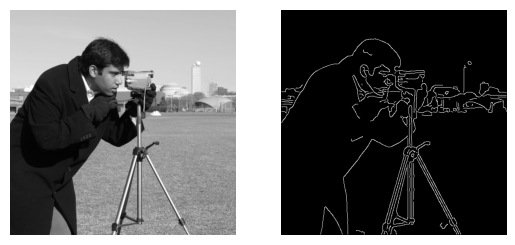

In [53]:
def apply_border_detection(img):
    # Aplicar el algoritmo de Canny para detectar los bordes
    edges = feature.canny(img, 2.0)
    return [img, edges]


# Cargar una imagen en escala de grises
image_gray = data.camera()

# Aplicar el algoritmo de detección de bordes
img, edges = apply_border_detection(image_gray)

# Mostrar la imagen original y la imagen con los bordes detectados
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.axis('off')

### Median Filter:
El filtro de la mediana se utiliza para eliminar el ruido impulsivo (sal y pimienta) en una imagen, preservando los bordes y características importantes.

(-0.5, 511.5, 511.5, -0.5)

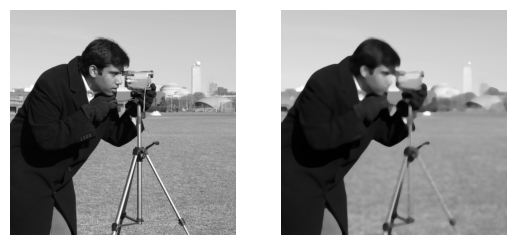

In [72]:
img = data.camera()

def apply_median_filter(img):
    return [img, filters.median(img, morphology.disk(5))]

image, med = apply_median_filter(img)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(med, cmap='gray')
plt.axis('off')

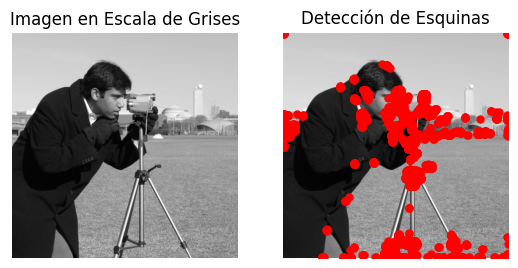

In [84]:
# Cargar una imagen en escala de grises
image_gray = data.camera()

# Detección de esquinas utilizando Harris Corner Detection
corners = feature.corner_harris(image_gray)

# Mostrar la imagen original y las esquinas detectadas
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
y, x = np.nonzero(corners > 0.01 * corners.max())  # Definir un umbral para seleccionar esquinas
plt.plot(x, y, 'ro', markersize=5)
plt.title('Detección de Esquinas')
plt.axis('off')

plt.show()